## Solution model for Internshala Data Science Course - Predictive Modelling Assignment

### We import the required python modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#### Import the training data

In [6]:
df = pd.read_csv('train.csv')

#### Exploratory Data Analysis

In [7]:
df.head()
# Here the traget varible is "count"

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


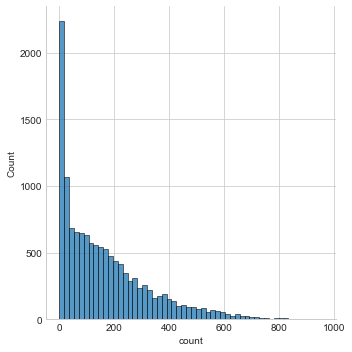

In [8]:
sns.displot(df['count'])

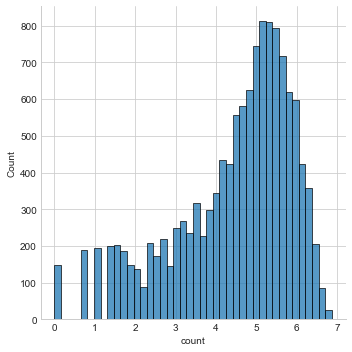

In [9]:
# Since the target variable is highly skewed we take it's log to transform it.
sns.displot(np.log(df['count']))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


<AxesSubplot:>

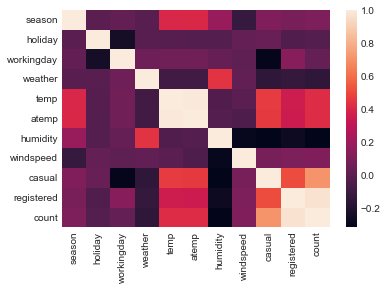

In [11]:
sns.heatmap(df.corr())

In [12]:
# atemp column is not neccessary so we dop it
df.drop('atemp', 1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3762037281.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('atemp', 1, inplace = True)


<AxesSubplot:>

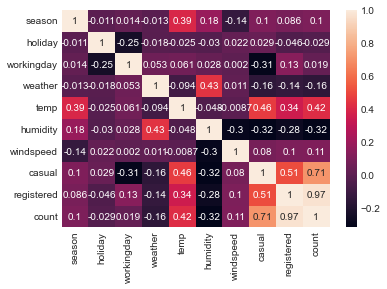

In [13]:
sns.heatmap(df.corr(), annot = True)

In [14]:
df.datetime

0         2011-01-01 0:00:00
1         2011-01-01 1:00:00
2         2011-01-01 2:00:00
3         2011-01-01 3:00:00
4         2011-01-01 4:00:00
                ...         
12975    2012-06-29 20:00:00
12976    2012-06-29 21:00:00
12977    2012-06-29 22:00:00
12978    2012-06-29 23:00:00
12979     2012-06-30 0:00:00
Name: datetime, Length: 12980, dtype: object

In [15]:
df.datetime

0         2011-01-01 0:00:00
1         2011-01-01 1:00:00
2         2011-01-01 2:00:00
3         2011-01-01 3:00:00
4         2011-01-01 4:00:00
                ...         
12975    2012-06-29 20:00:00
12976    2012-06-29 21:00:00
12977    2012-06-29 22:00:00
12978    2012-06-29 23:00:00
12979     2012-06-30 0:00:00
Name: datetime, Length: 12980, dtype: object

In [16]:
df['date'] = df['datetime'].apply(lambda x:x.split()[0])

In [17]:
df['hour'] = df['datetime'].apply(lambda x: x.split()[1].split(":")[0])

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0,0.0,3,13,16,2011-01-01,0
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0,0.0,8,32,40,2011-01-01,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0,0.0,5,27,32,2011-01-01,2
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0,0.0,3,10,13,2011-01-01,3
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0,0.0,0,1,1,2011-01-01,4


In [19]:
training = df[df.datetime<='2012-03-30 0:00:00']
validation = df[df.datetime>'2012-03-30 0:00:00']

In [20]:
training.drop(['datetime', 'date'], 1, inplace = True)
validation.drop(['datetime', 'date'], 1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3970634175.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training.drop(['datetime', 'date'], 1, inplace = True)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3970634175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training.drop(['datetime', 'date'], 1, inplace = True)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3970634175.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validation.drop(['datetime', 'date'], 1, inplace = True)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3970634175.py:2: SettingWithCopyWarning: 
A value is trying to be set on 

In [21]:
print(training.shape, validation.shape)

(10774, 11) (2206, 11)


#### Model Building

In [22]:
X_train = training.drop('count', 1)
X_val = validation.drop('count', 1)
y_train = np.log(training['count'])
y_val = np.log(validation['count'])

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\479912155.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = training.drop('count', 1)
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\479912155.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_val = validation.drop('count', 1)


#### Linear Regression

In [23]:
lmodel = LinearRegression()

In [24]:
lmodel.fit(X_train, y_train)

LinearRegression()

In [25]:
lmodel.score(X_val, y_val)

0.6079677309190348

In [26]:
prediction = lmodel.predict(X_val)

In [27]:
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [28]:
rmsle(y_val, prediction)

0.8875420172296656

#### Decision Tree Regressor

In [29]:
dtr = DecisionTreeRegressor()

In [30]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
prediction1 = dtr.predict(X_val)

In [32]:
dtr.score(X_val, y_val)

0.9989142100468114

In [33]:
rmsle(y_val, prediction1)

0.047788211756583474

### Test Prediction

In [34]:
test = pd.read_csv('test.csv')

In [35]:
test.drop('atemp', 1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\3559115662.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop('atemp', 1, inplace = True)


In [36]:
test['date'] = test['datetime'].apply(lambda x:x.split()[0])

In [37]:
test['hour'] = test['datetime'].apply(lambda x: x.split()[1].split(":")[0])

In [38]:
test.drop(['datetime', 'date'], 1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\259855212.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop(['datetime', 'date'], 1, inplace = True)


In [39]:
test

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour
0,3,0,0,3,26.24,89.0,15.0013,3,55,1
1,3,0,0,2,26.24,89.0,0.0000,7,54,2
2,3,0,0,2,26.24,89.0,0.0000,3,20,3
3,3,0,0,2,25.42,94.0,0.0000,3,15,4
4,3,0,0,1,26.24,89.0,11.0014,3,7,5
...,...,...,...,...,...,...,...,...,...,...
4394,1,0,1,2,10.66,60.0,11.0014,11,108,19
4395,1,0,1,2,10.66,60.0,11.0014,8,81,20
4396,1,0,1,1,10.66,60.0,11.0014,7,83,21
4397,1,0,1,1,10.66,56.0,8.9981,13,48,22


In [40]:
training.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4


In [41]:
Test_Prediction = np.log(dtr.predict(test))

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_10384\2859933504.py:1: RuntimeWarning: divide by zero encountered in log
  Test_Prediction = np.log(dtr.predict(test))


In [45]:
Test_Prediction

array([1.40129208, 1.41758331, 1.14278681, ..., 1.5040351 , 1.41363562,
       1.35887699])

In [43]:
submission = pd.DataFrame()
submission['count'] = Test_Prediction

In [44]:
submission.to_csv('submission.csv', header=True, index = False)